#**Regression task - SD-TSIA 210 Project** 
Group 13 - Domitille Labaye, Mona Mokart, Tom Reppelin, Lola Vitrac. 

The aim of this project is **to understand which characteristics influence the quality of wine**. We have 2 databases, one for red wines and one for white wines. In these two databases, **12 features are available** about each wine:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

Concerning the quality of the wines, it is **a score attributed between 0 and 10**. Thanks to several machine learning methods studied in class, we will see which features are the most significant. The reasoning that we will follow is the following: 

##### **I. Visualization of the data:** 
First, we need to explore the two databases, represent them graphically and see if any trends are already emerging. 

##### **II. Preparing the data:** 
Then we studied the correlations between the data, normalized them and separated them into Xtrain and Xtest so that we could apply our methods. We also combined the two databases into one, adding a column that can take the value 1 or 0 depending on the color of the wine (red or white).

##### **III. Regressions:**
We first considered this problem as a regression problem, as the features are continuous. The different methods we have applied are : 
1. Multiple linear regression
2.  Polynomial regression
3. Decision Tree regression
4. Random Forest regression 
5. Support Vector Regression 

##### **IV. Classification:** 
As this problem can also be seen as a classification problem, we decided to test random forest classifier on our database as it was the regression model that obtained the best scores. 

##### **V. Conclusion and comparison:** 
Finally, we could compare the models used and deduce which one was the most appropriate. By analyzing the results of the models, we could also deduce the impact of each feature on the quality of the wines. 




Before starting all of this, let's do the import statements and download our data from the csv files.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm
import statsmodels.api as sm 
from scipy.stats import chi2_contingency
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import files
data_to_load = files.upload()
df_red = pd.read_csv('winequality-red.csv', sep = ';')
df_white =  pd.read_csv('winequality-white.csv', sep = ';')

Saving winequality-red.csv to winequality-red (1).csv
Saving winequality-white.csv to winequality-white (1).csv


In [98]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#**I. Data visualisation** 

Let's quickly visualize our data by plotting the distribution of the quality for the red (on the left) and the white (on the right) wine. Because if it is quite similar, we might study our databases without differenting the color of the wine.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


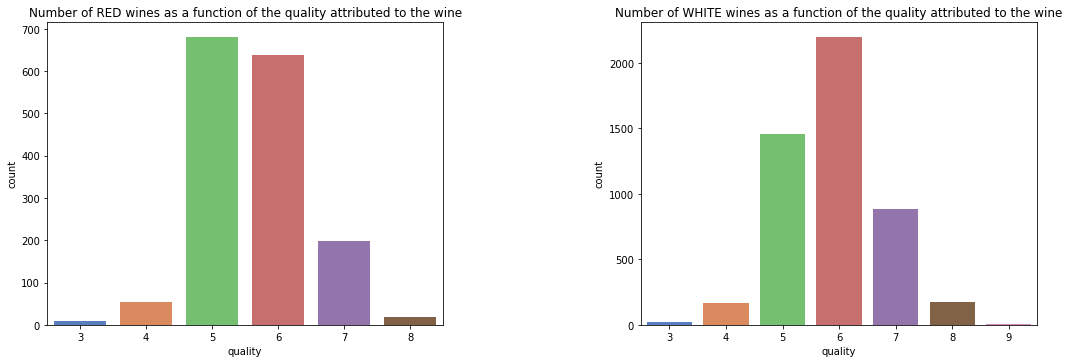

In [ ]:
plt.figure(1,figsize=(10,6))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0)

# graphic in 1st position : red wines 
plt.subplot(1,2,1)
sns.countplot(df_red["quality"], palette="muted")
plt.title("Number of RED wines as a function of the quality attributed to the wine")

# graphic in second position : white wines
plt.subplot(1,2,2)
sns.countplot(df_white["quality"], palette="muted")
plt.title("Number of WHITE wines as a function of the quality attributed to the wine")

plt.show()

For both our databases, it seems that the most awarded scores are around 5 and 6. However, white wines are on average rated higher than red wines, so we will separate the study of the two wine colours for the moment. Let's see for the rest of our features if they seem to be impactfull on the wine quality (and if the same features impact the quality of the red and the white wine).

#### Vizualization for the **red** wines

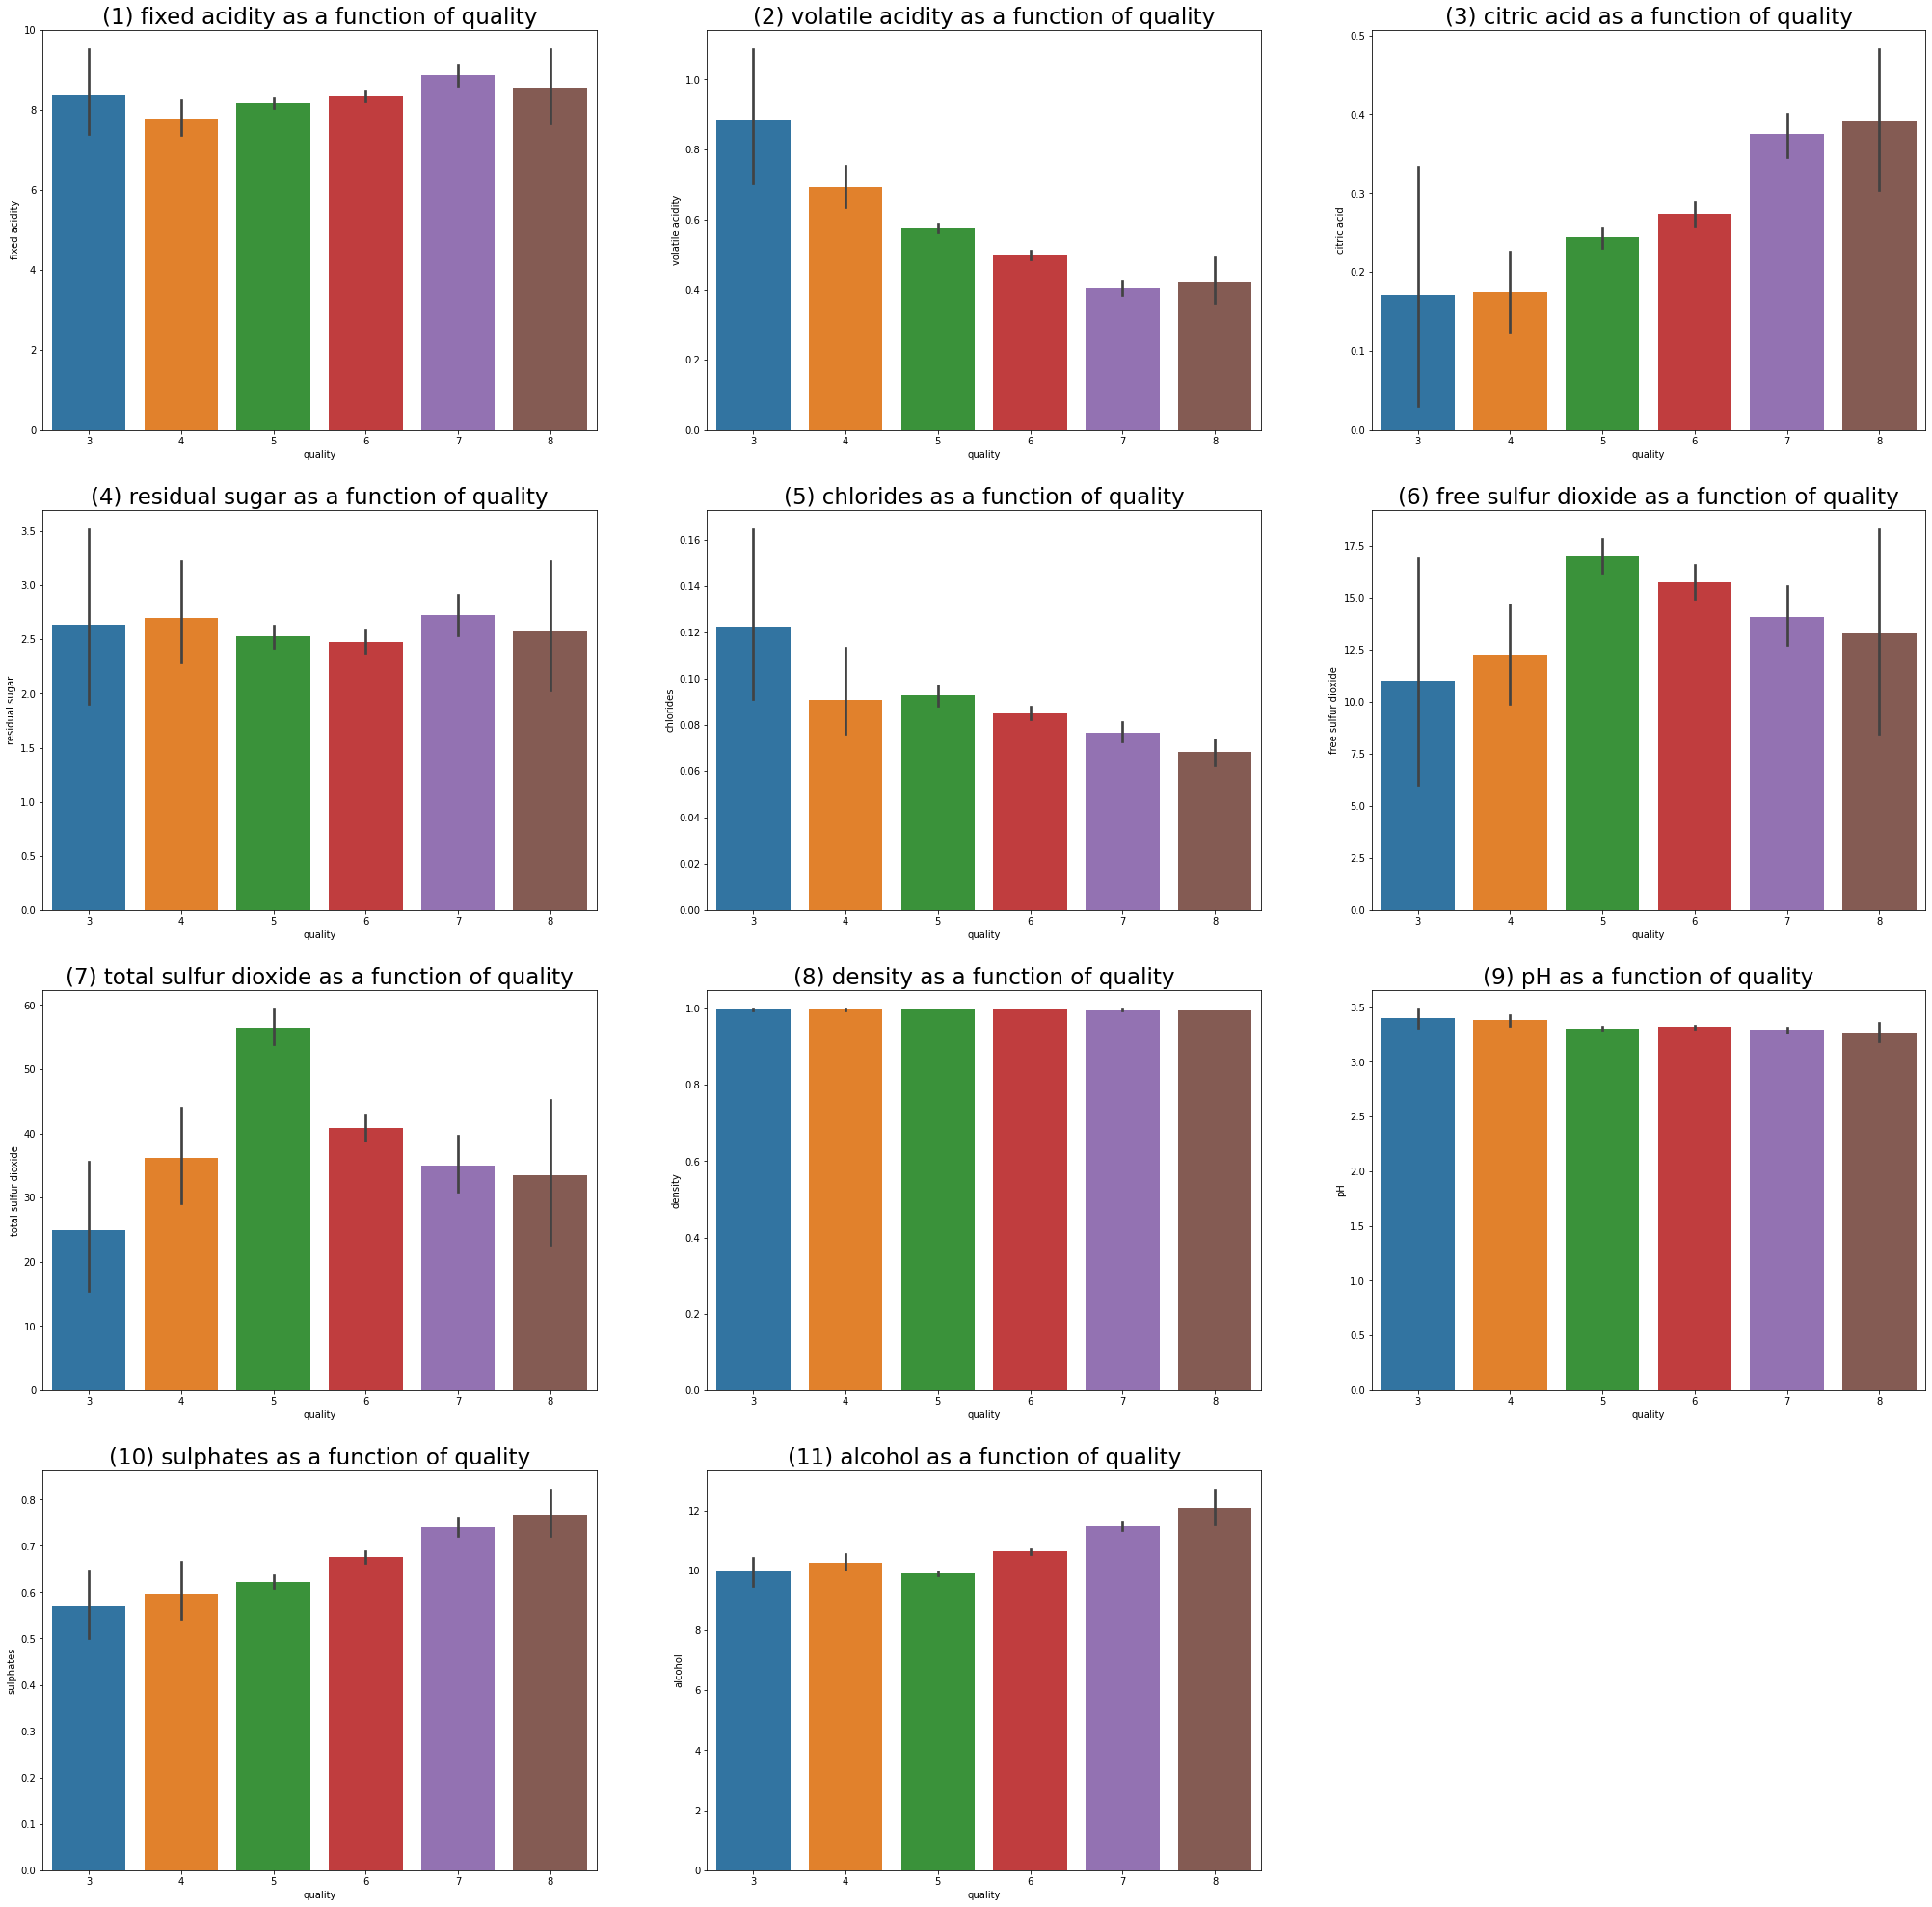

In [ ]:
columns = df_white.columns
plt.figure(1,figsize=(35,200))
j=1
for i in range (len(columns)-1):
  plt.subplot(22,3,j)
  sns.barplot(x = 'quality', y = columns[i], data = df_red)
  plt.title("({}) {} as a function of quality".format(j,columns[i]), fontsize=23)
  j+=1
  
plt.show()

#### Vizualization for the **white** wines

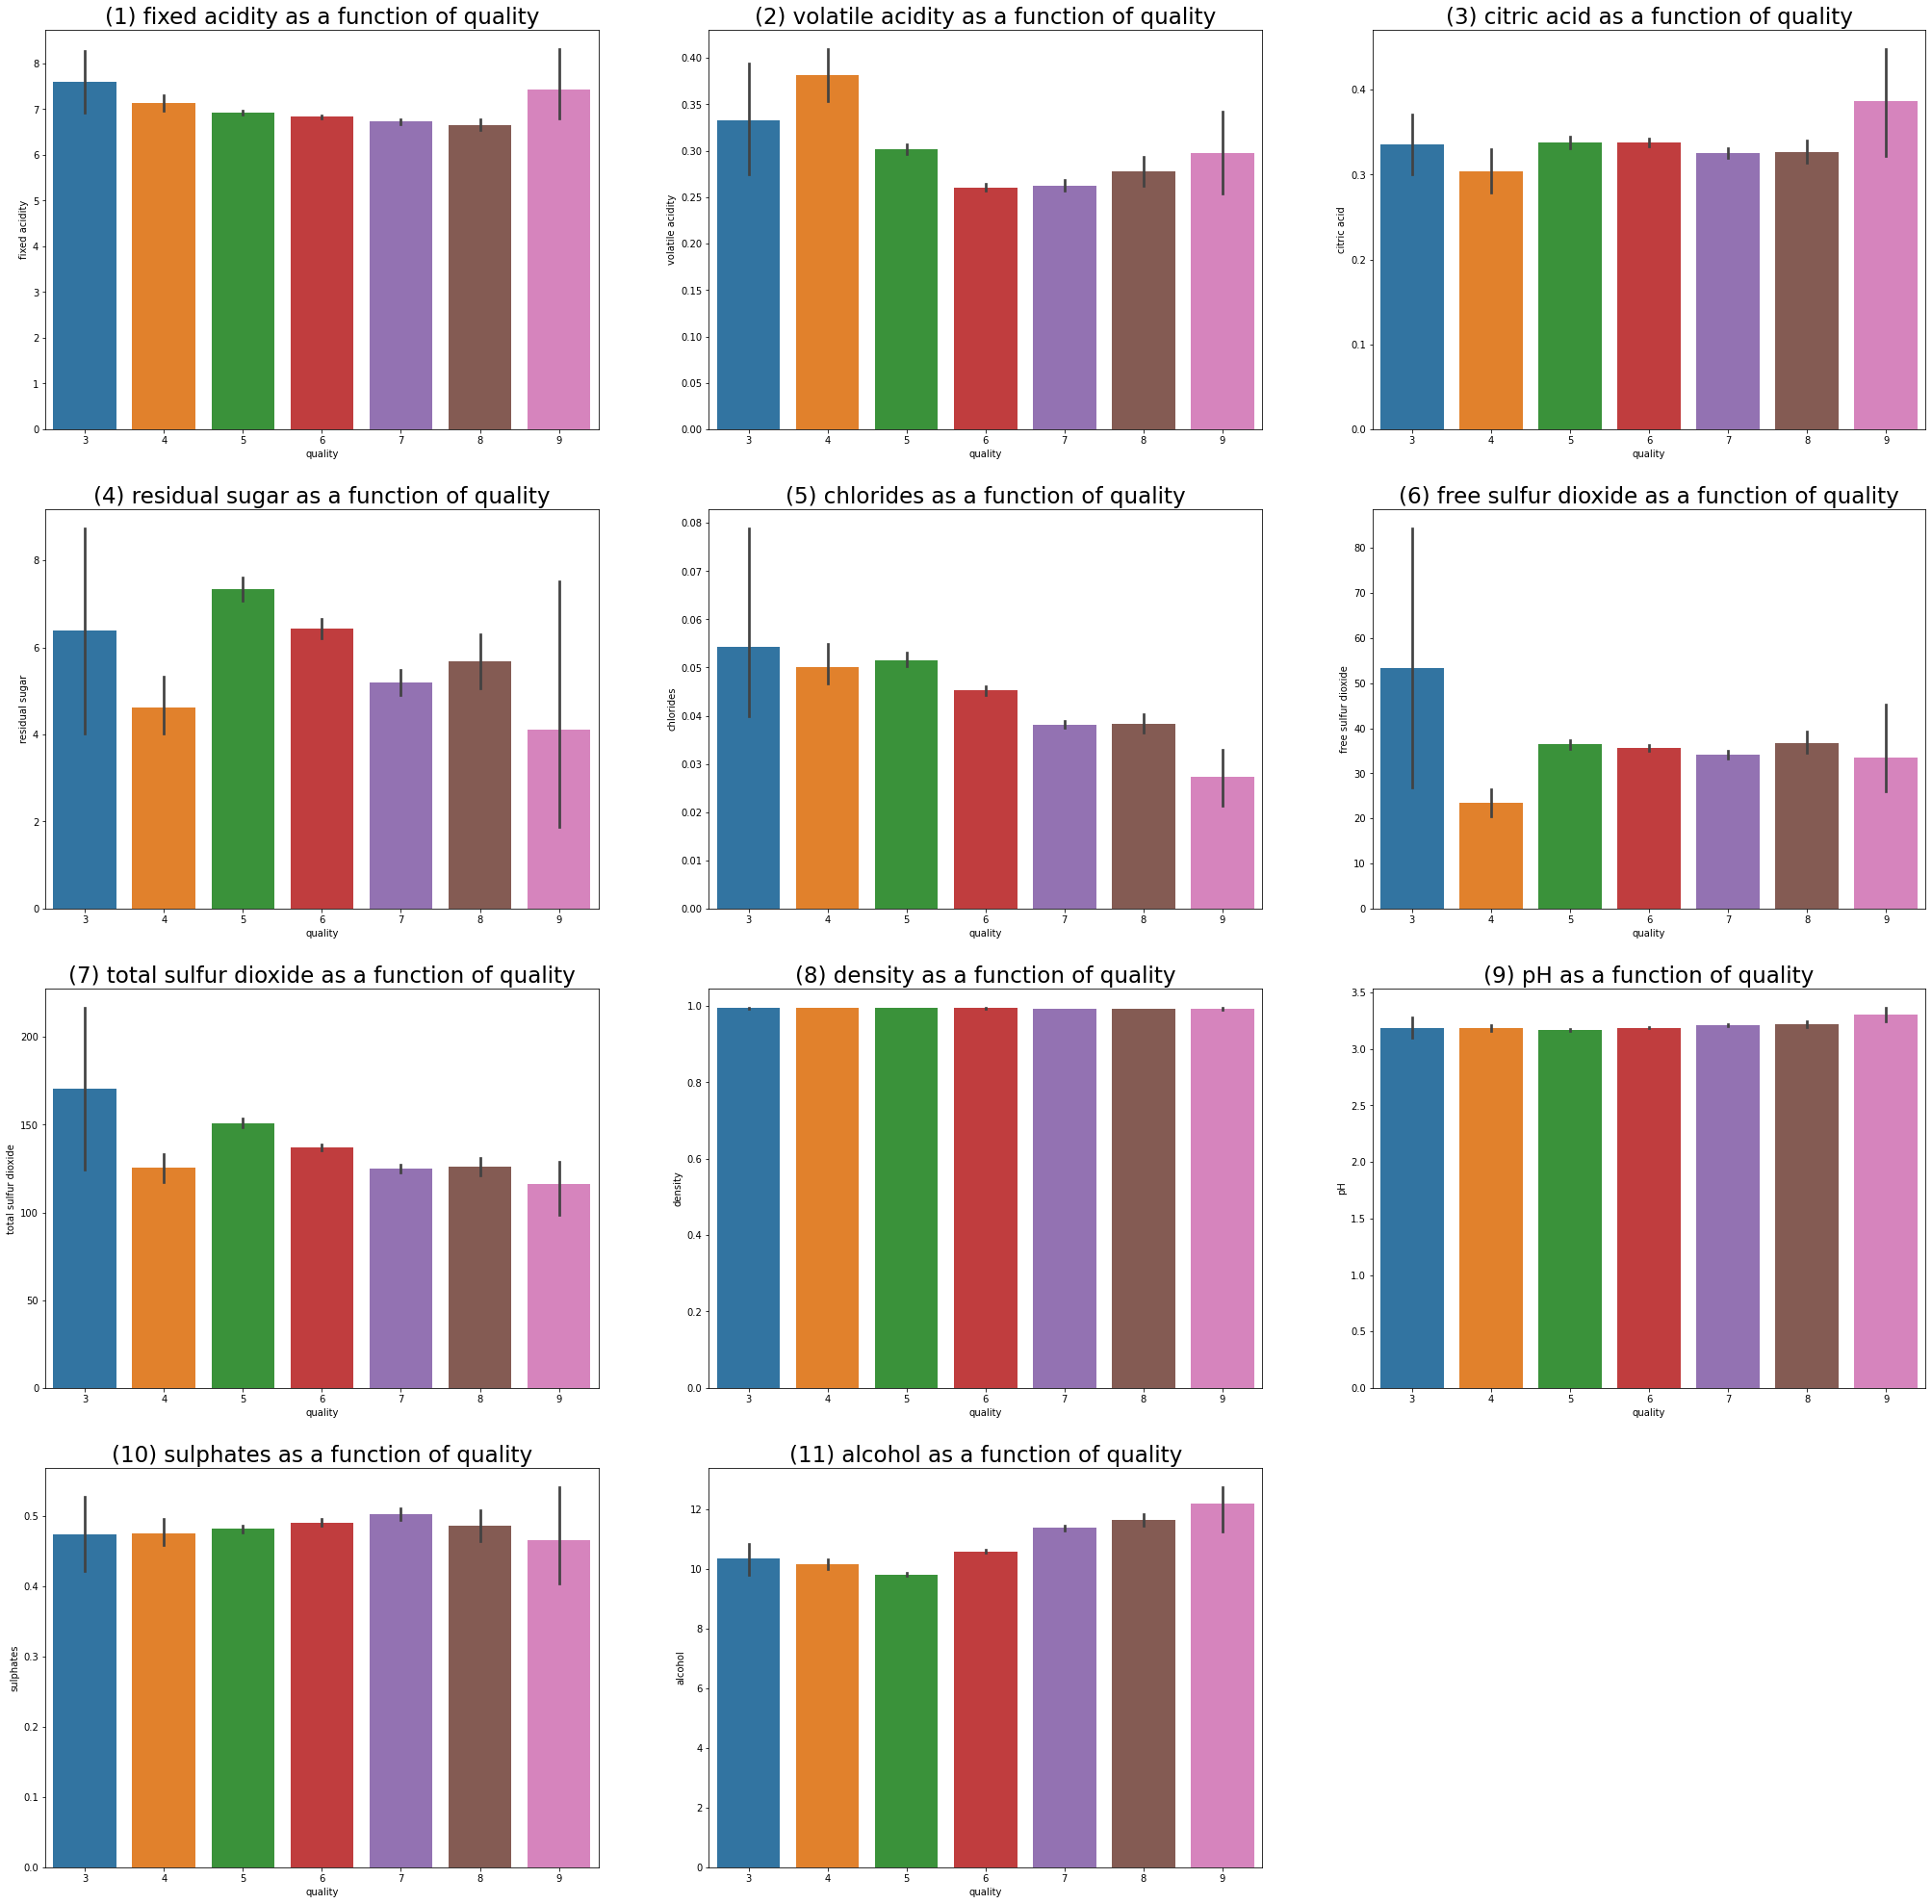

In [ ]:
plt.figure(1,figsize=(35,200))
j=1
for i in range (len(columns)-1):
  plt.subplot(22,3,j)
  sns.barplot(x = 'quality', y = columns[i], data = df_white)
  plt.title("({}) {} as a function of quality".format(j,columns[i]), fontsize=23)
  j+=1
  
plt.show()

#### Deduction from the Data vizualization

In [ ]:
#compute of the stats about our features
red_stats = round(df_red[columns].describe(),2)
white_stats = round(df_white[columns].describe(),2)
pd.concat([red_stats, white_stats], axis=0, keys=['Red wines stats', 'White wines stats']).T

Red wines stats                ... White wines stats                
                               count   mean    std  ...               50%     75%     max
fixed acidity                 1599.0   8.32   1.74  ...              6.80    7.30   14.20
volatile acidity              1599.0   0.53   0.18  ...              0.26    0.32    1.10
citric acid                   1599.0   0.27   0.19  ...              0.32    0.39    1.66
residual sugar                1599.0   2.54   1.41  ...              5.20    9.90   65.80
chlorides                     1599.0   0.09   0.05  ...              0.04    0.05    0.35
free sulfur dioxide           1599.0  15.87  10.46  ...             34.00   46.00  289.00
total sulfur dioxide          1599.0  46.47  32.90  ...            134.00  167.00  440.00
density                       1599.0   1.00   0.00  ...              0.99    1.00    1.04
pH                            1599.0   3.31   0.15  ...              3.18    3.28    3.82
sulphates                     1599.0   0.66   0.17  ...              0.47    0.55    1.08
alcohol                       1599.0  10.42   1.07  ...             10.40   11.40   14.20
quality                       1599.0   5.64   0.81  ...              6.00    6.00    9.00

[12 rows x 16 columns]

From the previous vizualizations and computation, we can deduce that :

*   Some features seem to be **more significant** than others (ex. alcohol, chlorides, fixed acidity...) but they **do not impact** the quality of red or white wine **the same way**. As an exemple, sulfates clearly impacts the quality of the red wines - as seen on graphs 10, but doesn't seem to be linked to the quality of white wines. 
*   The **contents of the red and white wines** seem to be **very different** on several points, which can explain that the significant features are not the same for the red or white wines. As an example, the means of residual sugar, free and total sulfur dioxide in white wine seem to be much higher than red wine.

Now that we have vizualize and understand our data, we can prepare it in order to apply our regression and classification methods.

#**II. Preparing data : check on correlations, normalization and spliting datasets** 




First, let's start by reuniting the two databases, by adding a 0/1 feature : 0 for red wines and 1 for white wines. 

In [ ]:
df_white = df_white.assign(wine_color = [1 for i in range (len(df_white))])
df_red = df_red.assign(wine_color = [0 for i in range (len(df_red))])
all_wine = pd.concat([df_red, df_white])
all_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Now, let's check the correlation of our variables, by computing a correlation matrix. 

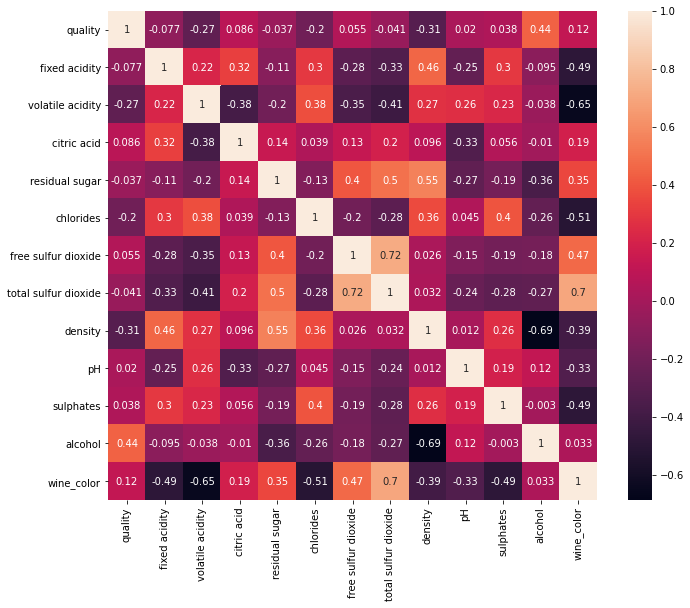

In [ ]:
Y = all_wine.iloc[0:len(all_wine),11] 
X1 = all_wine.iloc[0:len(all_wine),0] 
X2 = all_wine.iloc[0:len(all_wine),1] 
X3 = all_wine.iloc[0:len(all_wine),2]
X4 = all_wine.iloc[0:len(all_wine),3]
X5 = all_wine.iloc[0:len(all_wine),4]
X6 = all_wine.iloc[0:len(all_wine),5]
X7 = all_wine.iloc[0:len(all_wine),6]
X8 = all_wine.iloc[0:len(all_wine),7]
X9 = all_wine.iloc[0:len(all_wine),8]
X10 = all_wine.iloc[0:len(all_wine),9]
X11 = all_wine.iloc[0:len(all_wine),10]
X12 = all_wine.iloc[0:len(all_wine),12]
df1 = pd.concat([Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12], axis=1)
df_reg1 = df1.dropna()

corrMatrix = df_reg1.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrMatrix,  square=True, annot=True)
plt.show()

From this correlation matrix, we deduce that there are high correlation between : 
- Fixed acidity and Density : 0.67
- Fixed acidity and Citric acid : 0.67
- Fixed acidity and pH : -0.68
- Free sulfur dioxide and Total sulfur dioxide : 0.67

Now that we have seen that there is high correlation between our data, we are going to select our most important features which will impact the most our wine quality, or in other words the one who have the highest correlation with the quality of the wine. 
Once this is done, we are going to split and normalize our data. 


In [ ]:
corr = all_wine.corr()['quality'].sort_values(ascending=False) #gives us the first column of the correlation matrix above
print(abs(corr) > 0.1)

quality                  True
alcohol                  True
wine_color               True
citric acid             False
free sulfur dioxide     False
sulphates               False
pH                      False
residual sugar          False
total sulfur dioxide    False
fixed acidity           False
chlorides                True
volatile acidity         True
density                  True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, wine color, chlorids, volatile acidity and density in order to study them better, as they are the other features have a really small correlation with the quality of our wine. We are still going to keep the 'sulphates' as we have seen in the data vizualization that it is linked to the quality of the red wines but not of the white wines. Let's drop the ones than do not have a big impact on the quality.

In [ ]:
#selecting most impacting features
all_wine = all_wine.drop(['citric acid','free sulfur dioxide','pH','residual sugar','total sulfur dioxide','fixed acidity'],axis=1)
all_wine.head()

,volatile acidity,chlorides,density,sulphates,alcohol,quality,wine_color
0,0.70,0.076,0.9978,0.56,9.4,5,0
1,0.88,0.098,0.9968,0.68,9.8,5,0
2,0.76,0.092,0.9970,0.65,9.8,5,0
3,0.28,0.075,0.9980,0.58,9.8,6,0
4,0.70,0.076,0.9978,0.56,9.4,5,0


Once this is done, we can split and normalize our data.

In [ ]:
# creating train and test splits
x = all_wine.drop(['quality'],axis=1)
y = all_wine['quality']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#normalizing our data
norm = MinMaxScaler() #creating the scaler
norm_fit = norm.fit(X_train) #fitting the scaler
X_train = norm_fit.transform(X_train) # transform trainig data
X_test = norm_fit.transform(X_test) # transform testing data 

#**III. Regressions** 
We can see this problem as a regression problem first. We are going to apply several regression techniques to our dataset to predict the quality of the wines.

**1. OLS, linear multiple regression**

First, we can compute the OLS for all the wines. 

In [ ]:
Y1 = df_reg1['quality']
X_reg1 = pd.concat([df_reg1['fixed acidity'],df_reg1['volatile acidity'],df_reg1['citric acid'],df_reg1['residual sugar'],df_reg1['chlorides'],df_reg1['free sulfur dioxide'],df_reg1['total sulfur dioxide'],df_reg1['density'], df_reg1['pH'], df_reg1['sulphates'],df_reg1['alcohol'],df_reg1['wine_color']], axis=1)
#X_reg1 = sm.add_constant(X_reg1) ## we add an intercept (beta_0) to our model

model = sm.OLS(Y1, X_reg1).fit() ## sm.OLS(output, input)
predictions = model.predict(X_reg1)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.404e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:31:21   Log-Likelihood:                         -7222.6
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6485   BIC:                                  1.455e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0022      0.011     -0.207      0.836      -0.023       0.018
volatile acidity        -1.5593      0.081    -19.207      0.000      -1.718      -1.400
citric acid             -0.0978      0.080     -1.224      0.221      -0.254       0.059
residual sugar           0.0222      0.002      9.272      0.000       0.017       0.027
chlorides               -0.9961      0.334     -2.980      0.003      -1.651      -0.341
free sulfur dioxide      0.0056      0.001      7.361      0.000       0.004       0.007
total sulfur dioxide    -0.0018      0.000     -5.503      0.000      -0.002      -0.001
density                  2.3022      0.313      7.362      0.000       1.689       2.915
pH                       0.0972      0.073      1.334      0.182      -0.046       0.240
sulphates                0.5828      0.074      7.853      0.000       0.437       0.728
alcohol                  0.3384      0.009     37.030      0.000       0.320       0.356
wine_color              -0.1324      0.048     -2.770      0.006      -0.226      -0.039
==============================================================================
Omnibus:                      138.156   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.093
Skew:                           0.023   Prob(JB):                     9.27e-67
Kurtosis:                       4.059   Cond. No.                     5.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Are the variables significant ?** We can answer this question using the p-value, for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis...

It appears clearly that the features having a p-value above 0.05 are among the features that we had identified previously as not impactful. We will now compute a second OLS with only the features that are meaningful regarding 
the quality of the wine. 


In [ ]:
Y = all_wine.iloc[0:len(all_wine),5]
X2 = all_wine.iloc[0:len(all_wine),0] 
X5 = all_wine.iloc[0:len(all_wine),1]
X8 = all_wine.iloc[0:len(all_wine),2]
X10 = all_wine.iloc[0:len(all_wine),3]
X11 = all_wine.iloc[0:len(all_wine),4]
X12 = all_wine.iloc[0:len(all_wine),6]
df2= pd.concat([Y,X2,X5,X8,X10,X11,X12], axis=1)
df_reg2 = df2.dropna()
Y2 = df_reg2['quality']
X_reg2 = pd.concat([df_reg2['volatile acidity'],df_reg2['chlorides'],df_reg2['density'],df_reg2['sulphates'],df_reg2['alcohol'],df_reg2['wine_color']], axis=1)
#X_reg1 = sm.add_constant(X_reg1) ## we add an intercept (beta_0) to our model

model2 = sm.OLS(Y2, X_reg2).fit() ## sm.OLS(output, input)
predictions2 = model2.predict(X_reg2)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          6.647e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:31:21   Log-Likelihood:                         -7302.5
No. Observations:                6497   AIC:                                  1.462e+04
Df Residuals:                    6491   BIC:                                  1.466e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
volatile acidity    -1.5772      0.075    -20.968      0.000      -1.725      -1.430
chlorides           -1.3343      0.328     -4.062      0.000      -1.978      -0.690
density              2.9714      0.111     26.686      0.000       2.753       3.190
sulphates            0.5414      0.074      7.347      0.000       0.397       0.686
alcohol              0.3135      0.008     39.444      0.000       0.298       0.329
wine_color          -0.1371      0.033     -4.150      0.000      -0.202      -0.072
==============================================================================
Omnibus:                      122.174   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.204
Skew:                           0.034   Prob(JB):                     1.04e-55
Kurtosis:                       3.965   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analyzing the results : 
1. **P-values** : Now we only have p-values under 0.05, which validates the model. 
2. **R-squared :** we can see here that this model has the same R-squared value, $R^2= 0,984$. This means that this model explains 98,4% of the variance in our depedent variables. This gives a good prediction model.

Now we can try to do the OLS on the separate data (train data and test data) so that we can access the score and accuracy. 

In [ ]:
model3 = LinearRegression() # sm.OLS(output, input)
model3.fit(X_train,y_train) 

# Print out the statistics
predictions3 = model3.predict(X_test)
MSE_reg= mean_squared_error(y_test, predictions3)
score_reg = model3.score(X_test,y_test)
print("MSE for Linear Regression : {}".format(MSE_reg))
print("Score for Linear Regression : {}".format(score_reg ))

MSE for Linear Regression : 0.5936871443942017
Score for Linear Regression : 0.2559185933523477


**2. Polynomial regression** 

In [ ]:
Y = all_wine.iloc[0:len(all_wine),5]
X2 = all_wine.iloc[0:len(all_wine),0] 
X5 = all_wine.iloc[0:len(all_wine),1]
X10 = all_wine.iloc[0:len(all_wine),3]
X11 = all_wine.iloc[0:len(all_wine),4]
X12 = all_wine.iloc[0:len(all_wine),6]
D1 = all_wine.iloc[0:len(all_wine),2]
D2 = D1*D1
D3 = D2*D1
D4 = D3*D1

df3 = pd.concat([Y,D1,D2,D3,D4,X2,X5,X10,X11,X12], axis=1)
df3.columns = ['Quality', 'Density', 'Density^2', 'Density^3', 'Density^4', 'volatile acidity','chlorides','sulphates','alcohol','wine_color']
df_reg3 = df3.dropna()

Y_chap = df_reg3['Quality']
X_reg3 = pd.concat([df_reg3.iloc[:,1],df_reg3.iloc[:,2],df_reg3.iloc[:,3],df_reg3.iloc[:,4],df_reg3.iloc[:,5],df_reg3.iloc[:,6],df_reg3.iloc[:,7],df_reg3.iloc[:,8],df_reg3.iloc[:,9]], axis=1)
model3 = sm.OLS(Y_chap,X_reg3).fit()
predictions3 = model3.predict(X_reg3)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.457e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:31:21   Log-Likelihood:                         -7282.6
No. Observations:                6497   AIC:                                  1.458e+04
Df Residuals:                    6488   BIC:                                  1.464e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Density           1.087e+05   2.43e+04      4.470      0.000    6.11e+04    1.56e+05
Density^2        -3.234e+05   7.24e+04     -4.465      0.000   -4.65e+05   -1.81e+05
Density^3         3.206e+05   7.19e+04      4.459      0.000     1.8e+05    4.61e+05
Density^4        -1.059e+05   2.38e+04     -4.453      0.000   -1.52e+05   -5.93e+04
volatile acidity    -1.5925      0.075    -21.177      0.000      -1.740      -1.445
chlorides           -1.3171      0.328     -4.016      0.000      -1.960      -0.674
sulphates            0.4996      0.074      6.729      0.000       0.354       0.645
alcohol              0.3315      0.013     25.671      0.000       0.306       0.357
wine_color          -0.1116      0.036     -3.132      0.002      -0.181      -0.042
==============================================================================
Omnibus:                      117.440   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.560
Skew:                           0.023   Prob(JB):                     5.79e-53
Kurtosis:                       3.942   Cond. No.                     1.26e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

It appears that all powers of the density are very impactful, and have much much bigger coefficient comparing to other features. However, we cannot determine clearly which power is the most appropriate. Therefore, we will use the function Polynomial Features from sklearn to determine which power of the Density leads to the best regression model. 

In [ ]:
model4=PolynomialFeatures(degree=3, interaction_only=False, include_bias=True, order='C')
X_poly = model4.fit_transform(X_train)
X_test_poly = model4.transform(X_test)
model4.fit(X_poly,y_train) 
lin4 = LinearRegression()
lin4.fit(X_poly, y_train)
predictions4=lin4.predict(X_test_poly)

MSE_poly= mean_squared_error(y_test, predictions4)
score_poly = lin4.score(X_poly,y_train)
print("MSE for Polynomial Regression : {}".format(MSE_poly))
print("Score for Polynomial Regression : {}".format(score_poly ))

MSE for Polynomial Regression : 2.2444459087991295
Score for Polynomial Regression : 0.3288848889768403


**3. Decision Tree Regression**

As on this problem, the quality is a quantitative variable based on **qualitative** and quatitative variables, it might be relevant to apply a decision tree regression method to this problem.  


In [ ]:
#Set the decision tree regression model
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
y_pred_regTree = decision_tree_reg.predict(X_test)

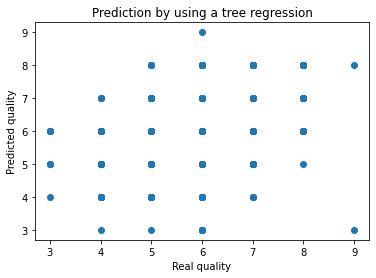

MSE for the regression tree method is : 0.7907692307692308
Score of regression decision tree : 0.00891119654468664


In [ ]:
#let's vizualize its performance on test
plt.scatter(y_test,y_pred_regTree)
plt.title("Prediction by using a tree regression")
plt.xlabel("Real quality")
plt.ylabel("Predicted quality")
plt.show()

# check its performance on test
MSE_regression_tree = mean_squared_error(y_test, y_pred_regTree)
score_regression_tree = decision_tree_reg.score(X_test,y_test)
print("MSE for the regression tree method is : {}".format(MSE_regression_tree))
print("Score of regression decision tree : {}".format(score_regression_tree ))

This method seems to make a lot of bad predictions, as **the MSE (mean squared error) is quite high** and as we can see on the previous graphic **the precision of our model isn't very good.**
Let's apply a random forest regression to see if the MSE decreases by performing random regression trees several times. 

**4. Random Forest Regression**


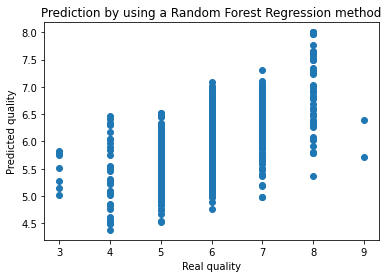

MSE of regression random forest method : 0.4336673846153846
Score of regression random forest method : 0.45647494541743805


In [ ]:
#set the random forest model
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
pred_random_forest_reg = random_forest_reg.predict(X_test)

#let's vizualize its performance on test
plt.scatter(y_test, pred_random_forest_reg)
plt.title("Prediction by using a Random Forest Regression method")
plt.xlabel("Real quality")
plt.ylabel("Predicted quality")
plt.show()

# check its performance on test
MSE_random_forest_reg =  mean_squared_error(y_test, pred_random_forest_reg)
score_random_forest_reg = random_forest_reg.score(X_test,y_test)
print("MSE of regression random forest method : {}".format(MSE_random_forest_reg))
print("Score of regression random forest method : {}".format(score_random_forest_reg))

The MSE is a lot better than with the previous method, but we can still improve this regression random forest model **by looking for the best parameters**.

In [ ]:
best_params = {"n_estimators": [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]}
random_forest_reg2 = GridSearchCV(RandomForestRegressor(), best_params, cv=10, n_jobs=-1)
random_forest_reg2.fit(X_train, y_train)
pred_random_forest_reg2 = random_forest_reg2.predict(X_test)

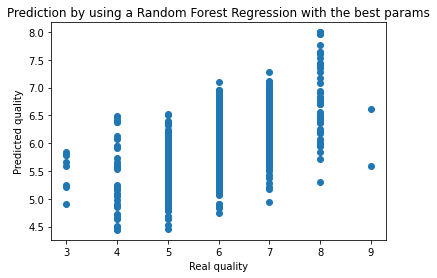

Best Parameters :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MSE of regression random forest method with best params is : 0.4342140854700854
Score of regression random forest method with best params is : 0.45578975298094637


In [ ]:
#let's vizualize its performance on test
plt.scatter(y_test, pred_random_forest_reg2)
plt.title("Prediction by using a Random Forest Regression with the best params")
plt.xlabel("Real quality")
plt.ylabel("Predicted quality")
plt.show()

# check its performance on test
MSE_random_forest_reg2 =  mean_squared_error(y_test, pred_random_forest_reg2)
score_random_forest_reg2 = random_forest_reg2.score(X_test,y_test)
print("Best Parameters : ", random_forest_reg2.best_estimator_)
print("MSE of regression random forest method with best params is : {}".format(MSE_random_forest_reg2))
print("Score of regression random forest method with best params is : {}".format(score_random_forest_reg2))

**5. Support Vector Classifier (SVC)**

In [ ]:
regressor = svm.SVR(kernel = 'rbf', degree=5, gamma=500)
regressor.fit(X_train, y_train)
predictions_svr = regressor.predict(X_test)

score_svr = regressor.score(X_test,y_test)
MSE_svr= mean_squared_error(y_test, predictions_svr)
print("MSE for Support Vector Regression : {}".format(MSE_svr))
print("Score for Support Vector Regression : {}".format(score_svr ))

MSE for Support Vector Regression : 0.5284577690172382
Score for Support Vector Regression : 0.3376720317475228


In [91]:
params=[{'C': np.logspace(-3,3,7), 'gamma':np.logspace(-2,3,6)}]
regressor2 = GridSearchCV(svm.SVR(), params, cv=5)
regressor2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
predictions_svr2 = regressor2.predict(X_test)
MSE_svr2 = mean_squared_error(y_test, predictions_svr2)
score_svr2 = regressor2.score(X_test,y_test)

print("MSE for best Support Vector Regression : {}".format(MSE_svr2))
print("Score for best Support Vector Regression : {}".format(score_svr2 ))

MSE for best Support Vector Regression : 0.5664092197132462
Score for best Support Vector Regression : 0.2901066278393418


#**IV. Classifications** 
This problem can also be seen as a classification problem. As we have seen previously that the random forest regression is the method that has the best scores and MSE, we are going to focus on the random forest classifier to see if it has a good accuracy. 

But first, as it seems that our data is not well balanced and that the ranges are between 3-8 in score, it might be better to make our data balanced before applying classification methods to it.


In [93]:
all_wine2 = pd.concat([df_red, df_white])
all_wine2['quality split'] = "" #Add a new feature, 0 represents a bad wine (btw 0 and 5) and 1 represents a good one (higher than 6)
all_wine2['quality split'] = [1 if each > 5 else 0 for each in all_wine2['quality']]
all_wine2 = all_wine2.drop(['quality'],axis=1)
print("Number of good wines :",all_wine2[all_wine2['quality split'] == 1].shape)
print("Number of bad wines :",all_wine2[all_wine2['quality split'] == 0].shape)

# creating train and test splits
x2 = all_wine2.drop(['quality split'],axis=1)
y2 = all_wine2['quality split']
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=40)

#normalizing our data
norm = MinMaxScaler() #creating the scaler
norm_fit = norm.fit(X_train2) #fitting the scaler
X_train2 = norm_fit.transform(X_train2) # transform trainig data
X_test2 = norm_fit.transform(X_test2) # transform testing data 

Number of good wines : (4113, 13)
Number of bad wines : (2384, 13)


For each method that we apply below, we first apply a grid search CV to find the best parameters in order to increase the accuracy of our models. 

**1. Desicion Tree classifier**

In [94]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_class = DecisionTreeClassifier()
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [5, 7, 8, 9, 10, 11, 15, 20, 25], "min_samples_leaf": [1, 2, 4, 5, 6]}
decision_tree_class = GridSearchCV(decision_tree_class, tree_params)
decision_tree_class.fit(X_train2, y_train2)
print("Best Parameters : ", decision_tree_class.best_estimator_)
print("Best Score : ", decision_tree_class.best_score_)

# check its performance on test
pred_decision_tree_class = decision_tree_class.predict(X_test2)
accuracy_dtc = accuracy_score(y_test2, pred_decision_tree_class)
print("The decision tree classifier accuracy on test data is {}".format(accuracy_dtc))

Best Parameters :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Score :  0.7598578514844154
The decision tree classifier accuracy on test data is 0.7653846153846153


Text(0.5, 1.0, 'Decision tree Regression method :\n Weight of the coefficient of the features\n impacting the quality of the wines')

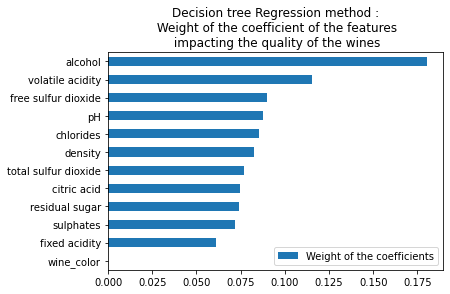

In [95]:
#let's see what features seems to be the more impacting the wine quality according to the result of the decision tree classification model
important_features_dtr = decision_tree_class.best_estimator_.feature_importances_
features_dtr = pd.DataFrame(important_features_dtr,index = all_wine2.columns[:-1],columns=['Weight of the coefficients']).sort_values('Weight of the coefficients', ascending=True) 
features_dtr.plot(kind='barh')
plt.title('Decision tree Regression method :\n Weight of the coefficient of the features\n impacting the quality of the wines')

**2. Random Forest Classifier**

In [96]:
random_forest = RandomForestClassifier(random_state=0)
best_param = {"n_estimators": [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]}
random_forest_class = GridSearchCV(random_forest, param_grid = best_param, scoring='accuracy', cv=5)
random_forest_class.fit(X_train2, y_train2)
print("Best Parameters : ", random_forest_class.best_estimator_)
print("Best Score : ", random_forest_class.best_score_)

# check its performance on test
pred_random_forest_class = random_forest_class.predict(X_test2)
accuracy_rfc = accuracy_score(y_test2, pred_random_forest_class)
print("The random forest model accuracy on test data is {}".format(accuracy_rfc))

Best Parameters :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Best Score :  0.8181644702746723
The random forest model accuracy on test data is 0.83


Text(0.5, 1.0, 'Weight of the coefficient of the features\n impacting the quality of the wines')

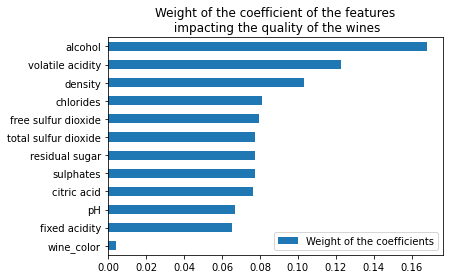

In [102]:
#let's see what features seems to be the more impacting the wine quality according to the result of the random forest model
important_features_rfc = random_forest_class.best_estimator_.feature_importances_
features_rfc = pd.DataFrame(important_features_rfc,index = all_wine2.columns[:-1],columns=['Weight of the coefficients']).sort_values('Weight of the coefficients', ascending=True) 
features_rfc.plot(kind='barh')
plt.title('Weight of the coefficient of the features\n impacting the quality of the wines')

It seems that the alcohol, the volatile acidity and the density are the two features which impact the most our final value of the quality according to the random forest algorithm. 

#**V. Conclusion and comparaison of our models** 



In [103]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Models", "MSE", "Scores"]
x.add_row(["OLS", MSE_reg, score_reg])
x.add_row(["Polynomial Regression", MSE_poly, MSE_poly])
x.add_row(["Decision Tree Regression", MSE_regression_tree, score_regression_tree])
x.add_row(["Random Forest Regression", MSE_random_forest_reg2, score_random_forest_reg2])
x.add_row(["Support Vector Regression", MSE_svr2, score_svr2])

print(x)

+---------------------------+--------------------+---------------------+
|           Models          |        MSE         |        Scores       |
+---------------------------+--------------------+---------------------+
|            OLS            | 0.5936871443942017 |  0.2559185933523477 |
|   Polynomial Regression   | 2.2444459087991295 |  2.2444459087991295 |
|  Decision Tree Regression | 0.7907692307692308 | 0.00891119654468664 |
|  Random Forest Regression | 0.4342140854700854 | 0.45578975298094637 |
| Support Vector Regression | 0.5664092197132462 |  0.2901066278393418 |
+---------------------------+--------------------+---------------------+


The random forest regression is the method that seems to be the more adapted to our database. Applying this method as a classifier method, we have a good accuracy and we observe that the volatile acidity and the density are the two features which impact the most our final value of the quality according to the random forest algorithm. But **this is when we have the two color of wines mixed** in our database, **let's see if studying the two colors separatly gives better accuracy of the random forest classifier model.** 

In [100]:
df_white2, df_red2 =df_white.copy(), df_red.copy()

#We prepare the white database for classification
df_white2['quality split'] = "" #Add a new feature, 0 represents a bad wine (btw 0 and 5) and 1 represents a good one (higher than 6)
df_white2['quality split'] = [1 if each > 5 else 0 for each in df_white2['quality']]
df_white2 = df_white2.drop(['quality'],axis=1)

#We prepare the red database for classification
df_red2['quality split'] = "" #Add a new feature, 0 represents a bad wine (btw 0 and 5) and 1 represents a good one (higher than 6)
df_red2['quality split'] = [1 if each > 5 else 0 for each in df_red2['quality']]
df_red2 = df_red2.drop(['quality'],axis=1)

# creating train and test splits
x_w, x_r = df_white2.drop(['quality split'],axis=1), df_red2.drop(['quality split'],axis=1)
y_w, y_r = df_white2['quality split'], df_red2['quality split']
X_train_w,X_test_w,y_train_w,y_test_w = train_test_split(x_w,y_w,test_size=0.2,random_state=40)
X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(x_r,y_r,test_size=0.2,random_state=40)

#normalizing our data
norm = MinMaxScaler() #creating the scaler 
norm_fit = norm.fit(X_train_w) #fitting the scaler for the white data
X_train_w = norm_fit.transform(X_train_w) # transform white trainig data
X_test_w = norm_fit.transform(X_test_w) # transform white testing data 
norm_fit = norm.fit(X_train_r) #fitting the scaler for the red data
X_train_r = norm_fit.transform(X_train_r) # transform white trainig data
X_test_r = norm_fit.transform(X_test_r) # transform white testing data 

The RF model accuracy on Test data is 0.823469387755102


Text(0.5, 1.0, 'WHITE WINES : Weight of the coefficient of the features\n impacting the quality of the wines')

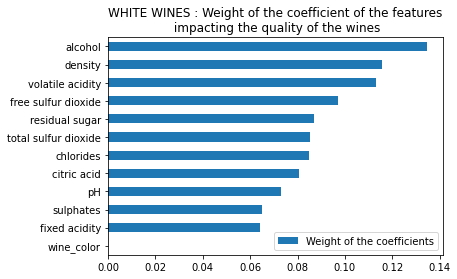

In [101]:
# applying random forest to the white data 
random_forest_w = RandomForestClassifier(random_state=0)
random_forest_rs_w = GridSearchCV(random_forest_w, param_grid = best_param, scoring='accuracy', cv=5)
random_forest_rs_w.fit(X_train_w, y_train_w)

# check its performance on test
pred_random_forest_w = random_forest_rs_w.predict(X_test_w)
accuracy_rfc_w = accuracy_score(y_test_w, pred_random_forest_w)
print("The RF model accuracy on Test data is {}".format(accuracy_rfc_w))

#let's see what features seems to be the more impacting the white wine quality according to the result of the random forest model
important_features_rfc_w = random_forest_rs_w.best_estimator_.feature_importances_
features_rfc_w = pd.DataFrame(important_features_rfc_w,index = df_white2.columns[:-1],columns=['Weight of the coefficients']).sort_values('Weight of the coefficients', ascending=True) 
features_rfc_w.plot(kind='barh')
plt.title('WHITE WINES : Weight of the coefficient of the features\n impacting the quality of the wines')

In [ ]:
# applying random forest to the red data 
random_forest_r = RandomForestClassifier(random_state=0)
random_forest_rs_r = GridSearchCV(random_forest_r, param_grid = best_param, scoring='accuracy', cv=5)
random_forest_rs_r.fit(X_train_r, y_train_r)

# check its performance on test
pred_random_forest_r = random_forest_rs_r.predict(X_test_r)
accuracy_rfc_r = accuracy_score(y_test_r, pred_random_forest_r)
print("The RF model accuracy on Test data is {}".format(accuracy_rfc_r))

#let's see what features seems to be the more impacting the white red quality according to the result of the random forest model
important_features_rfc_r = random_forest_rs_r.best_estimator_.feature_importances_
features_rfc_r = pd.DataFrame(important_features_rfc_r,index = df_red2.columns[:-1],columns=['Weight of the coefficients']).sort_values('Weight of the coefficients', ascending=True) 
features_rfc_r.plot(kind='barh')
plt.title('RED WINES : Weight of the coefficient of the features\n impacting the quality of the wines')

Overall, it seems that studying the quality of the wines by separating the two colors is not that relevant, as the accuracy decreases for the random forest classifier method applied to the white database comparing to the accuracy obtained with the mixed database. 
Anyway, it seems clear that the alcohol is the feature that is the most significant for both colors of wines. But the white wine quality is more impacted by the density than the red wine, which quality seems to be based mainly on alcohol and sulphates' content.
